In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
m = 100
w = np.array([[-4], [2], [1]])
X = np.hstack([np.ones([m,1]), 2*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

print(w.shape); print(X.shape)

(3, 1)
(100, 3)


In [9]:
# Sigmoid funciton

y = (np.exp(X*w)/(1+np.exp(X*w))) > 0.5 

# same expression
# y = (1)/(1+np.exp(-X*w))) > 0.5 

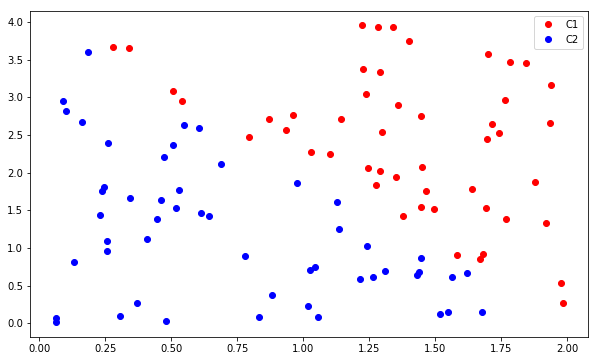

In [10]:
C1 = np.where(y == True)[0]
C2 = np.where(y == False)[0]

# True / Flase class -> 1 / 0 binary coding
y = np.empty([m,1])
y[C1] = 1
y[C2] = 0
y = np.asmatrix(y)

plt.figure(figsize = (10,6))
plt.plot(X[C1,1], X[C1,2], 'ro', label='C1')
plt.plot(X[C2,1], X[C2,2], 'bo', label='C2')
plt.legend()
plt.show()

In [14]:
w = cvx.Variable(3, 1)

obj = cvx.Maximize(y.T*X*w - cvx.sum_entries(cvx.logistic(X*w))) # y.T*X*w is trick for computing summation w.T*x (objective function)
prob = cvx.Problem(obj, []).solve() # [] constraint

In [15]:
w = w.value

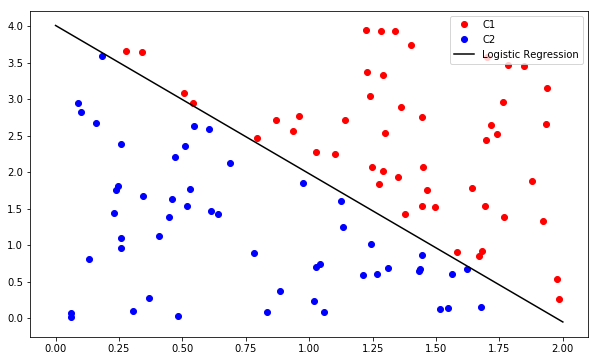

In [16]:
# xp, yp -> below line on the plot
xp = np.linspace(0,2,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10,6))
plt.plot(X[C1,1], X[C1,2], 'ro', label='C1')
plt.plot(X[C2,1], X[C2,2], 'bo', label='C2')
plt.plot(xp, yp, 'k', label='Logistic Regression')
plt.legend()
plt.show()

In [11]:
cvx.sum_entries?